In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# processing tables
champ_df = pd.read_csv("projectData/champs.csv").sort_values('id')
participants_df = pd.read_csv("projectData/participants.csv")
participants_df['position'] = participants_df['position'].astype('category')
participants_df['role'] = participants_df['role'].astype('category')
participants_df = participants_df.merge(champ_df,left_on='championid',right_on='id',how='left').drop(['id_x', 'id_y'], axis=1)
participants_df.columns.values[7] = 'Champion Name'
participants_df.columns.values[2] = 'Champion ID'
stats_df = pd.read_csv('projectData/stats1.csv')
stats2_df = pd.read_csv('projectData/stats2.csv',low_memory=False)
stats_df = stats_df.append(stats2_df)
stats_df = stats_df.reset_index(drop=True)
participants_df['index'] = participants_df.index
participants_stats_df = participants_df.merge(stats_df,left_on='index',right_on='id')
participants_stats_df = participants_stats_df.drop('index',axis=1)
participants_stats_df = participants_stats_df[1:]

In [3]:
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
participants_stats_df.head(10)

,matchid,player,Champion ID,ss1,ss2,role,position,Champion Name,id,win,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
1,11,1,115,3,4,DUO_SUPPORT,BOT,Ziggs,10,0,...,1,1,0,211,14,1,0,17,3,0
2,11,2,69,4,7,DUO_CARRY,BOT,Cassiopeia,11,0,...,3,1,2,182,14,1,0,13,5,0
3,11,3,157,14,4,SOLO,MID,Yasuo,12,0,...,6,6,0,106,15,0,0,3,0,0
4,11,4,4,4,12,SOLO,TOP,Twisted Fate,13,0,...,4,3,1,159,15,0,0,10,0,0
5,11,5,28,4,11,NONE,JUNGLE,Evelynn,14,1,...,111,81,30,808,16,0,0,8,2,0
6,11,6,51,7,4,DUO_CARRY,BOT,Caitlyn,15,1,...,6,0,6,179,16,1,0,7,0,0
7,11,7,62,14,4,SOLO,TOP,Wukong,16,1,...,6,3,3,48,17,0,0,8,0,0
8,11,8,134,4,1,SOLO,MID,Syndra,17,1,...,7,2,5,440,16,1,0,6,1,1
9,11,9,43,14,4,DUO_SUPPORT,BOT,Karma,18,1,...,2,1,1,260,16,5,0,25,7,0
10,11,10,19,4,11,NONE,JUNGLE,Warwick,19,0,...,2,2,0,236,12,3,0,14,3,0


In [5]:
participants_stats_df.columns

Index(['matchid', 'player', 'Champion ID', 'ss1', 'ss2', 'role', 'position',
       'Champion Name', 'id', 'win', 'item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'trinket', 'kills', 'deaths', 'assists',
       'largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'legendarykills', 'totdmgdealt', 'magicdmgdealt',
       'physicaldmgdealt', 'truedmgdealt', 'largestcrit', 'totdmgtochamp',
       'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'totheal',
       'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', '

In [6]:
cols_to_drop = ['player','matchid','ss1','ss2','id','item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'trinket', 'kills', 'deaths', 'assists',
       'largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'legendarykills', 'totdmgdealt', 'magicdmgdealt',
       'physicaldmgdealt', 'truedmgdealt', 'largestcrit', 'totdmgtochamp',
       'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'totheal',
       'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood']
win = participants_stats_df.drop(cols_to_drop,axis=1)

In [7]:
win.head(10)

,Champion ID,role,position,Champion Name,win
1,115,DUO_SUPPORT,BOT,Ziggs,0
2,69,DUO_CARRY,BOT,Cassiopeia,0
3,157,SOLO,MID,Yasuo,0
4,4,SOLO,TOP,Twisted Fate,0
5,28,NONE,JUNGLE,Evelynn,1
6,51,DUO_CARRY,BOT,Caitlyn,1
7,62,SOLO,TOP,Wukong,1
8,134,SOLO,MID,Syndra,1
9,43,DUO_SUPPORT,BOT,Karma,1
10,19,NONE,JUNGLE,Warwick,0


In [8]:
win_position = win.drop(['Champion ID','Champion Name'],axis=1)
win_position.head(10)

,role,position,win
1,DUO_SUPPORT,BOT,0
2,DUO_CARRY,BOT,0
3,SOLO,MID,0
4,SOLO,TOP,0
5,NONE,JUNGLE,1
6,DUO_CARRY,BOT,1
7,SOLO,TOP,1
8,SOLO,MID,1
9,DUO_SUPPORT,BOT,1
10,NONE,JUNGLE,0


In [9]:
win_position = win_position.groupby(['position','role']).count().dropna()

In [10]:
win_position

win
position role                 
BOT      DUO           48698.0
         DUO_CARRY    328477.0
         DUO_SUPPORT  328472.0
         NONE           2700.0
         SOLO           4987.0
JUNGLE   NONE         367049.0
MID      DUO            8919.0
         DUO_CARRY      4547.0
         DUO_SUPPORT    4548.0
         NONE           2479.0
         SOLO         345831.0
TOP      DUO            1236.0
         DUO_CARRY       356.0
         DUO_SUPPORT     356.0
         NONE             54.0
         SOLO         354778.0

In [11]:
win_position['win_rate (%)'] = (win_position['win']/1834520*100).round(3)
win_position

win  win_rate (%)
position role                               
BOT      DUO           48698.0         2.655
         DUO_CARRY    328477.0        17.905
         DUO_SUPPORT  328472.0        17.905
         NONE           2700.0         0.147
         SOLO           4987.0         0.272
JUNGLE   NONE         367049.0        20.008
MID      DUO            8919.0         0.486
         DUO_CARRY      4547.0         0.248
         DUO_SUPPORT    4548.0         0.248
         NONE           2479.0         0.135
         SOLO         345831.0        18.851
TOP      DUO            1236.0         0.067
         DUO_CARRY       356.0         0.019
         DUO_SUPPORT     356.0         0.019
         NONE             54.0         0.003
         SOLO         354778.0        19.339

### Interestingly, do a solo rank as jungler might have the highest win rate compared to other position

## analysis on other attributes for different position

In [12]:
cols_drop = ['player','matchid','ss1','ss2','id','item1', 'item2', 'item3', 'item4',
       'item5', 'item6','Champion ID','Champion Name','win','trinket','largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills','pentakills','legendarykills']
pos_stats = participants_stats_df.drop(cols_drop,axis=1).dropna()
pos_stats.head(10)

,role,position,kills,deaths,assists,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
1,DUO_SUPPORT,BOT,0,2,12,25995,17633,6295,2066,0,...,1,1,0,211,14,1,0,17,3,0
2,DUO_CARRY,BOT,7,8,5,171568,1725,169576,266,1042,...,3,1,2,182,14,1,0,13,5,0
3,SOLO,MID,5,11,2,113721,989,109563,3168,455,...,6,6,0,106,15,0,0,3,0,0
4,SOLO,TOP,2,8,2,185302,166671,16867,1763,0,...,4,3,1,159,15,0,0,10,0,0
5,NONE,JUNGLE,3,3,9,148791,29447,107327,12015,0,...,111,81,30,808,16,0,0,8,2,0
6,DUO_CARRY,BOT,4,5,11,130692,118760,11580,351,0,...,6,0,6,179,16,1,0,7,0,0
7,SOLO,TOP,13,4,8,145731,86725,22692,36313,0,...,6,3,3,48,17,0,0,8,0,0
8,SOLO,MID,15,3,9,182680,1735,173731,7213,843,...,7,2,5,440,16,1,0,6,1,1
9,DUO_SUPPORT,BOT,4,5,19,85785,67341,7979,10464,0,...,2,1,1,260,16,5,0,25,7,0
10,NONE,JUNGLE,2,7,5,46790,41813,4515,462,0,...,2,2,0,236,12,3,0,14,3,0


In [13]:
group_by_cols = ['position','role']

In [14]:
pos_stats_kills_deaths_assists = pos_stats[['role','position','kills','deaths','assists']].copy()
pos_stats_kills_deaths_assists= pos_stats_kills_deaths_assists.groupby(group_by_cols).sum().dropna()
pos_stats_kills_deaths_assists

kills     deaths    assists
position role                                        
BOT      DUO           282438.0   282978.0   403092.0
         DUO_CARRY    1906360.0  1906614.0  2732221.0
         DUO_SUPPORT  1898546.0  1912280.0  2733024.0
         NONE           15260.0    15468.0    22671.0
         SOLO           28876.0    28838.0    41021.0
JUNGLE   NONE         2124992.0  2134278.0  3053288.0
MID      DUO            51162.0    51562.0    74345.0
         DUO_CARRY      26752.0    26696.0    38145.0
         DUO_SUPPORT    26321.0    26932.0    38093.0
         NONE           14876.0    14865.0    21181.0
         SOLO         2004240.0  2010070.0  2875910.0
TOP      DUO             7065.0     7095.0    10057.0
         DUO_CARRY       2064.0     2009.0     2864.0
         DUO_SUPPORT     2055.0     1993.0     2900.0
         NONE             315.0      319.0      339.0
         SOLO         2053790.0  2064812.0  2945520.0

Text(0.5,1,'Kills, Deaths, Assits by Position')

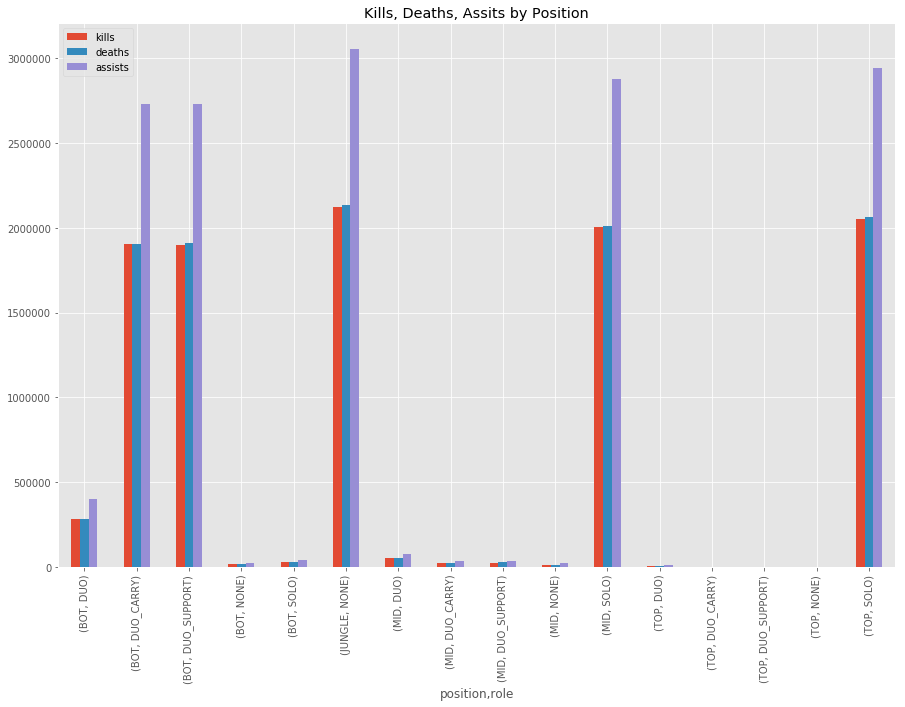

In [15]:
pos_stats_kills_deaths_assists.plot.bar(figsize=(15,10))
plt.title('Kills, Deaths, Assits by Position')

In [16]:
pos_stats.columns

Index(['role', 'position', 'kills', 'deaths', 'assists', 'totdmgdealt',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp',
       'totheal', 'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

In [17]:
pos_stats_dmgsdealt = pos_stats[['role','position',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp']].copy()
pos_stats_dmgsdealt= pos_stats_dmgsdealt.groupby(group_by_cols).sum().dropna()/1000000
pos_stats_dmgsdealt = pos_stats_dmgsdealt.round(1)
pos_stats_dmgsdealt

magicdmgdealt  physicaldmgdealt  truedmgdealt  \
position role                                                         
BOT      DUO                 1873.5            3402.5         302.8   
         DUO_CARRY          12815.7           22926.5        2101.3   
         DUO_SUPPORT        12807.5           22866.8        2063.6   
         NONE                 107.0             177.9          16.3   
         SOLO                 195.5             348.3          30.1   
JUNGLE   NONE               14311.2           25550.1        2316.0   
MID      DUO                  353.0             612.0          53.8   
         DUO_CARRY            179.2             321.0          28.3   
         DUO_SUPPORT          179.5             314.7          29.9   
         NONE                 101.6             180.2          13.9   
         SOLO               13484.6           24122.1          27.0   
TOP      DUO                   50.0              84.2           8.9   
         DUO_CARRY             12.8              25.6           1.8   
         DUO_SUPPORT           13.3              25.5           2.3   
         NONE                   1.9               4.1           0.2   
         SOLO               13830.2           24743.7        2258.0   

                      largestcrit  totdmgtochamp  magicdmgtochamp  \
position role                                                       
BOT      DUO                 11.8          859.8            373.2   
         DUO_CARRY           79.6         5828.2           2547.9   
         DUO_SUPPORT         79.6         5812.4           2546.1   
         NONE                 0.6           46.7             21.2   
         SOLO                 1.2           88.0             38.6   
JUNGLE   NONE                88.7         6494.6           2845.3   
MID      DUO                  2.1          156.9             69.5   
         DUO_CARRY            1.1           81.5             35.8   
         DUO_SUPPORT          1.1           81.3             35.6   
         NONE                 0.6           45.4             19.7   
         SOLO                83.8         6125.1           2679.5   
TOP      DUO                  0.3           22.0              9.9   
         DUO_CARRY            0.1            6.3              2.7   
         DUO_SUPPORT          0.1            6.5              2.8   
         NONE                 0.0            1.0              0.4   
         SOLO                86.1         6278.2           2743.6   

                      physdmgtochamp  truedmgtochamp  
position role                                         
BOT      DUO                   437.8            48.8  
         DUO_CARRY            2949.4           330.7  
         DUO_SUPPORT          2938.0           328.2  
         NONE                   23.0             2.5  
         SOLO                   44.4             5.0  
JUNGLE   NONE                 3280.5           368.6  
MID      DUO                    78.2             9.2  
         DUO_CARRY              41.2             4.5  
         DUO_SUPPORT            41.2             4.5  
         NONE                   23.1             2.5  
         SOLO                 3099.1           346.2  
TOP      DUO                    10.7             1.3  
         DUO_CARRY               3.3             0.4  
         DUO_SUPPORT             3.4             0.3  
         NONE                    0.5             0.0  
         SOLO                 3179.1           355.3

Text(0.5,1,'Damage Dealt Statistics by Position')

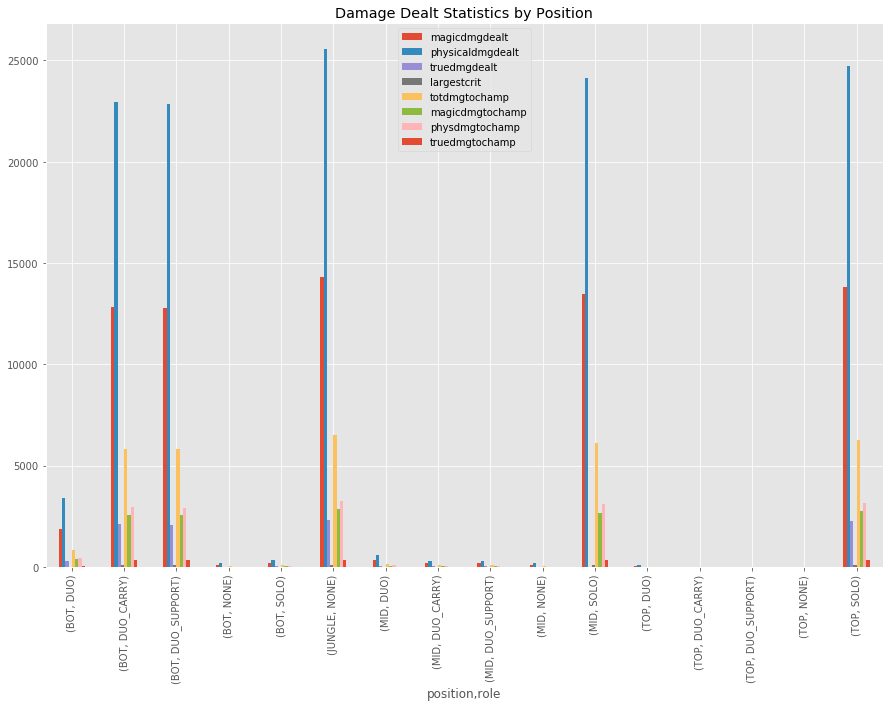

In [20]:
pos_stats_dmgsdealt.plot.bar(figsize=(15,10))
plt.title('Damage Dealt Statistics by Position')

Text(0.5,1,'Damage Taken Statistics by Position')

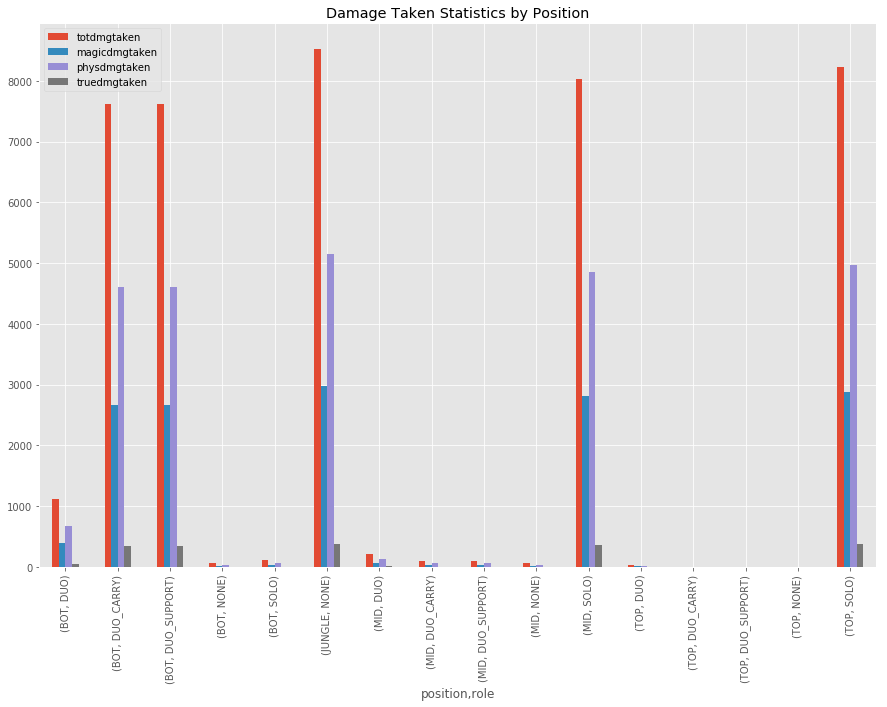

In [21]:
pos_stats_dmgs_taken = pos_stats[['role','position',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken','truedmgtaken']].copy()
pos_stats_dmgs_taken= pos_stats_dmgs_taken.groupby(group_by_cols).sum().dropna()/1000000
pos_stats_dmgs_taken = pos_stats_dmgs_taken.round(1)
pos_stats_dmgs_taken
pos_stats_dmgs_taken.plot.bar(figsize=(15,10))
plt.title('Damage Taken Statistics by Position')